In [78]:
import os
import numpy as np
os.getcwd()
os.chdir('C:\\Users\\skulkarni4\\Downloads\\Text Analytics')

In [79]:
import pandas as pd 
df = pd.read_json('Trump_tweets_2015_2019.json')

In [80]:
#Checking info about all columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25708 entries, 0 to 25707
Data columns (total 7 columns):
source            25708 non-null object
text              25708 non-null object
created_at        25708 non-null datetime64[ns, UTC]
retweet_count     25708 non-null int64
favorite_count    25708 non-null int64
is_retweet        25650 non-null float64
id_str            25708 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(2)
memory usage: 1.4+ MB


In [81]:
# Checking datatypes of all the columns
df.dtypes

source                         object
text                           object
created_at        datetime64[ns, UTC]
retweet_count                   int64
favorite_count                  int64
is_retweet                    float64
id_str                          int64
dtype: object

In [82]:
# In order to group our tweets by year we create column year' based on the year value in 'created_at column' column
df['year'] = df.created_at.dt.year
df['year'].head()


0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: int64

The columns - source, is_retweet, id_str are not needed for our analysis. Also, we have converted the datetime column created_at into an new column 'year', hence removing all of them from the dataframe.


In [83]:
# Dropping the columns
df = df.drop(columns=['source','created_at','is_retweet','id_str'])
df.columns

Index(['text', 'retweet_count', 'favorite_count', 'year'], dtype='object')

In [84]:
# Grouping the tweets by year
df_group = df.groupby('year')


Tweet groups are created from years 2015 to 2019.
Creating new dataframes for each year group for analyzing

In [85]:
# Creating year groups
df2015 = df_group.get_group(2015)
df2016 = df_group.get_group(2016)
df2017 = df_group.get_group(2017)
df2018 = df_group.get_group(2018)
df2019 = df_group.get_group(2019)

Preprocessing for Year 2015

In [86]:
from string import punctuation
import re

In [87]:
# Function to Preprocess and clean the input dataframe for analysis

In [88]:
def cal_number(df_input):
    
    tweetstring_t =''
    tweetlist_t = []

# Getting the tweet string and tweet list
    for i in df_input.index:
        tweetstring_t = tweetstring_t + ' ' + df_input.loc[i, 'text']
        tweetlist_t.append(df_input.loc[i, 'text']) 

# Removing punctuation
# Removing '.' manually as strip doesn't remove the end of sentence punctuation
    tweetstring_t = tweetstring_t.strip(punctuation).lower().replace(".", "")

# Removing URLs (in Regex, S is a character match for non-whitespace, s matches whitespace)
    tweetstring_t = re.sub(r'https?[a-z\.\:\/]\S+', ' ', tweetstring_t)
    tweetstring_t

# Get all the stop words  from the nltk library
    import nltk
    stop_words = nltk.corpus.stopwords.words('english')


# Let's filter out the stop words from the words list
    words_t = tweetstring_t.split()
    words_t = [w for w in words_t if w not in stop_words]
    words_t = [w for w in words_t if w not in ['amp', 'u']]
    print("Total Number of words :",len(words_t))

# Create lists of Twitter handles mentined in the tweets for the given year
# w matches word characters a-zA-Z0-9_; W matches non-word characters
    handles_t = []
    for w in words_t:
        if re.search(r'^@\w+', w):
            handles_t.append(w)
    handles_t = [re.sub(r'[!?:\.]+', '', h) for h in handles_t]
    #handles_t[0:5]

# Get Frequency distribution of handles
    handles_Frequency = nltk.FreqDist(handles_t)

# Total no of handles
    print("Total Number of Handles : ", len(handles_t))

# Now we have all the twitter handles frequency distribution, removing the handles, hashtags to clean the data even more
    tweetstring_t = re.sub(r'@\S+', ' ', tweetstring_t)
    tweetstring_t = re.sub(r'#\S+', ' ', tweetstring_t)
    tweetstring_t = re.sub(r'[^a-z\s]+', ' ', tweetstring_t)
    tweetstring_t = re.sub(r'\s\w\s', ' ', tweetstring_t)
    tweetstring_t

# Using ntlk tokenize to get all the words from the tweet string and then clean the words
    words_t = nltk.tokenize.word_tokenize(tweetstring_t)
    words_t = [w for w in words_t if w not in stop_words]
    words_t = [w for w in words_t if w not in ['amp', 'u']]
    words_t = [w for w in words_t if w.isalpha()]
    len(words_t)

# Get Frequency distribution of words
    freqdist_words_t = nltk.FreqDist(words_t)
    freqdist_words_t

# Performing Lemmatization to group together inflected forms of all words
    wordnet = nltk.stem.WordNetLemmatizer()
    lemmatized = [wordnet.lemmatize(w) for w in words_t]
#print(lemmatized[:100])
    len(list(set(lemmatized)))

# Get Frequency distribution of words
    words_freqdist_lm = nltk.FreqDist(lemmatized)
    words_freqdist_lm
    return tweetstring_t,tweetlist_t,words_t,freqdist_words_t,handles_t,handles_Frequency,words_freqdist_lm

In [89]:
# Passing the grouped dataframes from 2015 to 2019 to the function to get the required values for further analysis
tweetstring_2015,tweetlist_2015,words_2015,freqdist_words_2015,handles_2015,handles2015_Frequency,words2015_freqdist_lm = cal_number(df2015)
tweetstring_2016,tweetlist_2016,words_2016,freqdist_words_2016,handles_2016,handles2016_Frequency,words2016_freqdist_lm = cal_number(df2016)
tweetstring_2017,tweetlist_2017,words_2017,freqdist_words_2017,handles_2017,handles2017_Frequency,words2017_freqdist_lm = cal_number(df2017)
tweetstring_2018,tweetlist_2018,words_2018,freqdist_words_2018,handles_2018,handles2018_Frequency,words2018_freqdist_lm = cal_number(df2018)
tweetstring_2019,tweetlist_2019,words_2019,freqdist_words_2019,handles_2019,handles2019_Frequency,words2019_freqdist_lm = cal_number(df2019)

Total Number of words : 77978
Total Number of Handles :  8313
Total Number of words : 44132
Total Number of Handles :  1988
Total Number of words : 32792
Total Number of Handles :  1078
Total Number of words : 64495
Total Number of Handles :  1374
Total Number of words : 118179
Total Number of Handles :  5982


In [90]:
# Analysis of Tweet Counts over the years
print('Total Number of Tweets in 2015: ',df2015.shape[0])
print('Total Number of Tweets in 2016: ',df2016.shape[0])
print('Total Number of Tweets in 2017: ',df2017.shape[0])
print('Total Number of Tweets in 2018: ',df2018.shape[0])
print('Total Number of Tweets in 2019: ',df2019.shape[0])

Total Number of Tweets in 2015:  7528
Total Number of Tweets in 2016:  4225
Total Number of Tweets in 2017:  2602
Total Number of Tweets in 2018:  3568
Total Number of Tweets in 2019:  7785


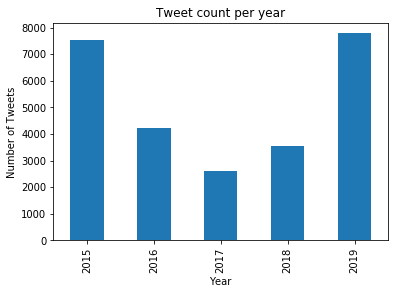

In [91]:
import matplotlib.pyplot as plt
df['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.title("Tweet count per year")
plt.show()

As per the above graph, President Trump has tweeted the most in the year 2019 and the least number of tweets are in the year 2017

In [92]:
#Analysis of frequently tweeted words - top 20

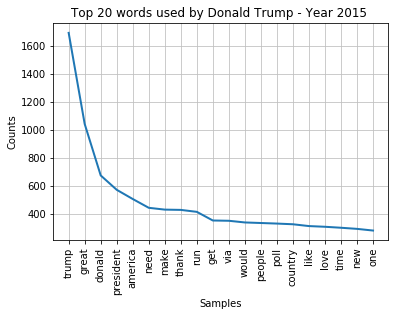

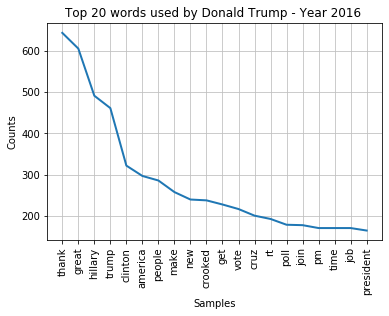

In [93]:
# Plot for the Year 2015
import matplotlib.pyplot as plt
words2015_freqdist_lm.plot(20, cumulative=False, title='Top 20 words used by Donald Trump - Year 2015 ')
# Plot for the Year 2016
words2016_freqdist_lm.plot(20, cumulative=False, title='Top 20 words used by Donald Trump - Year 2016 ')
plt.show()

In the year 2015 and 2016, the most commonly used words used by Donald Trump include trump, america, great, make, president which suggests that he was preparing for contesting for president and by using words such as great, make, America suggests high use of phrases like "Let's make America great again". 

In the year 2016, when Trump was contesting the elections against Hilary Clinton, words Hilary, Clinton, crooked are a part of the most commonly used words, which suggests that he often criticized his opponents.

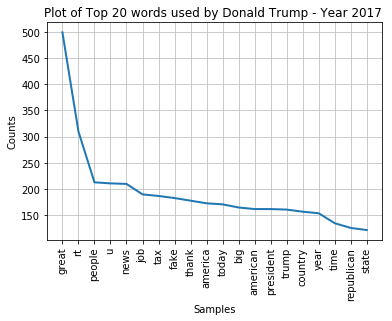

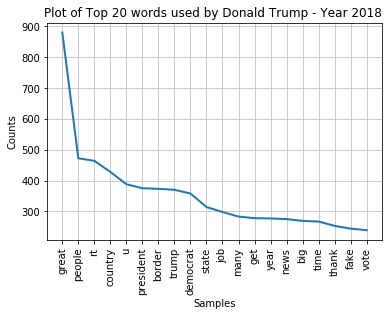

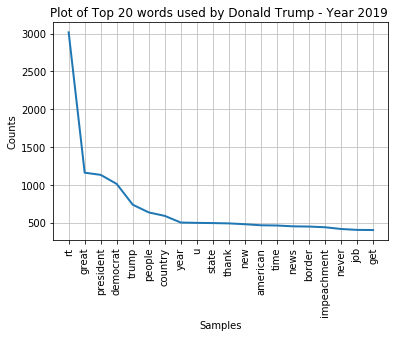

In [106]:
# Plot for the Year 2017
words2017_freqdist_lm.plot(20, cumulative=False, title='Plot of Top 20 words used by Donald Trump - Year 2017 ')
# Plot for the Year 2018
words2018_freqdist_lm.plot(20, cumulative=False, title='Plot of Top 20 words used by Donald Trump - Year 2018 ')
# Plot for the Year 2019
words2019_freqdist_lm.plot(20, cumulative=False, title='Plot of Top 20 words used by Donald Trump - Year 2019 ')

After Trump became the president, words like people, country, thank, job, democrates have been used commonly in the tweets which is indicative of his thankful behaviour after getting elected as president.


# Analysis of top 20 frequently mentioned twitter handles

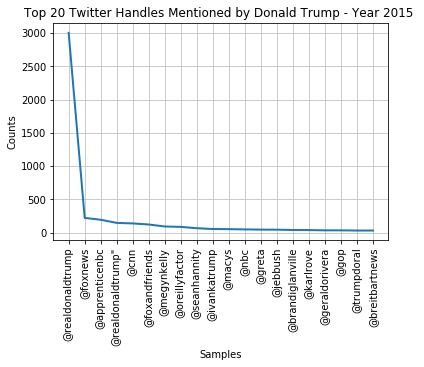

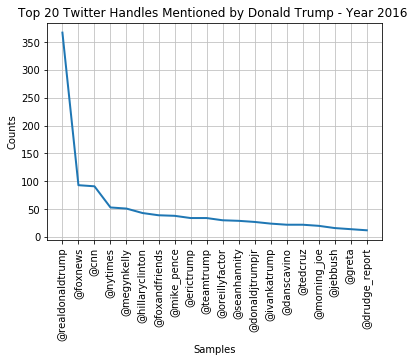

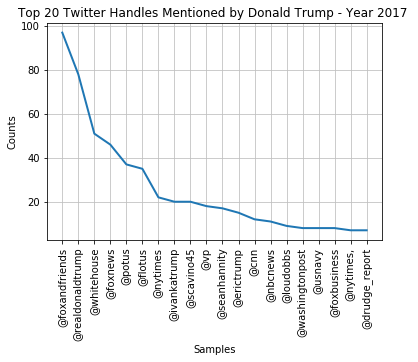

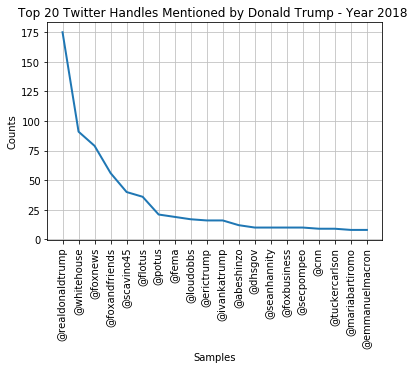

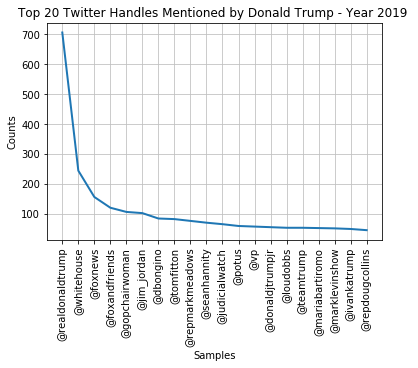

In [95]:
# Plot for the Year 2015
handles2015_Frequency.plot(20, cumulative=False, title='Top 20 Twitter Handles Mentioned by Donald Trump - Year 2015 ')
# Plot for the Year 2016
handles2016_Frequency.plot(20, cumulative=False, title='Top 20 Twitter Handles Mentioned by Donald Trump - Year 2016 ')
# Plot for the Year 2017
handles2017_Frequency.plot(20, cumulative=False, title='Top 20 Twitter Handles Mentioned by Donald Trump - Year 2017 ')
# Plot for the Year 2018
handles2018_Frequency.plot(20, cumulative=False, title='Top 20 Twitter Handles Mentioned by Donald Trump - Year 2018 ')
# Plot for the Year 2019
handles2019_Frequency.plot(20, cumulative=False, title='Top 20 Twitter Handles Mentioned by Donald Trump - Year 2019 ')

The graphs above show the trend of how Donald Trump has mentioned twitter handels in his tweets over the years. 

Observations:
@realdonaldtrump is the the most commonly used twitter handle throughout the years 2015-2019. 

Many of the twitter handles are the same for the 5 years

1. @foxnews and @realdonaldtrump are in top 4 twitter handles for all the 4 years.
2. @cnn has been in the top 20 for the year 2015, 2016 , 2017 and 2018
3. @potus and @whitehouse has been in the top 20 in the year 2017, 2018 and 2019 right after Donald Trump became the President.


In [96]:
## Sentimental Analysis using NLTK 

In [97]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import matplotlib.pyplot as plt

In [98]:
def calculate_polarity(tweetlist):
    sentiment = {}
    analyzer = SIA()
    polarity = [0]*len(tweetlist)
    for i, tweet in enumerate(tweetlist):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        sentiment[i] = analyzer.polarity_scores(tweet)
        polarity[i] = sentiment[i]['compound']
        
    return polarity

In [99]:
df2015['polarity'] = calculate_polarity(tweetlist_2015)
df2016['polarity'] = calculate_polarity(tweetlist_2016)
df2017['polarity'] = calculate_polarity(tweetlist_2017)
df2018['polarity'] = calculate_polarity(tweetlist_2018)
df2019['polarity'] = calculate_polarity(tweetlist_2019)

C:\Users\skulkarni4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\skulkarni4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\skulkarni4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

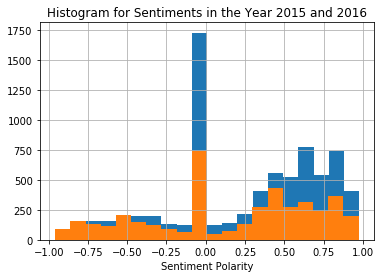

In [100]:
plt.title('Histogram for Sentiments in the Year 2015 and 2016')
plt.xlabel('Sentiment Polarity')
df2015['polarity'].hist(bins=20) #blue
df2016['polarity'].hist(bins=20) #orange

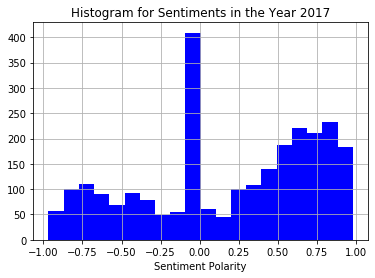

In [101]:
plt.title('Histogram for Sentiments in the Year 2017')
plt.xlabel('Sentiment Polarity')
df2017['polarity'].hist(bins=20, color = 'blue')


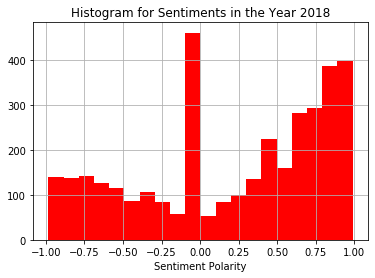

In [102]:
plt.title('Histogram for Sentiments in the Year 2018')
plt.xlabel('Sentiment Polarity')
df2018['polarity'].hist(bins=20, color = 'red') 

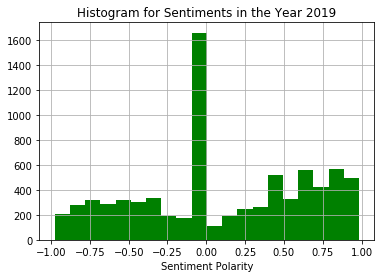

In [103]:
plt.title('Histogram for Sentiments in the Year 2019')
plt.xlabel('Sentiment Polarity')
df2019['polarity'].hist(bins=20, color = 'green') 

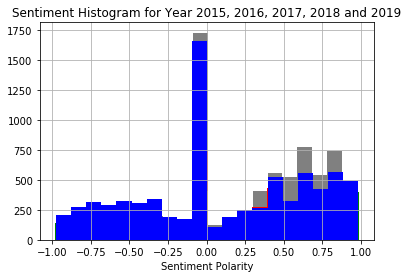

In [104]:
plt.title('Sentiment Histogram for Year 2015, 2016, 2017, 2018 and 2019')
plt.xlabel('Sentiment Polarity')
df2015['polarity'].hist(bins=20,color = 'grey') 
df2016['polarity'].hist(bins=20, color = 'red') 
df2017['polarity'].hist(bins=20, color = 'orange') 
df2018['polarity'].hist(bins=20, color = 'green') 
df2019['polarity'].hist(bins=20, color = 'blue') 

In [105]:
# Average Polarity
print('Average Polarity for 2015 : ' , df2015['polarity'].mean())
print('Average Polarity for 2016 : ' ,df2016['polarity'].mean())
print('Average Polarity for 2017 : ' ,df2017['polarity'].mean())
print('Average Polarity for 2018 : ' ,df2018['polarity'].mean())
print('Average Polarity for 2019 : ' ,df2019['polarity'].mean())

Average Polarity for 2015 :  0.25974161795961787
Average Polarity for 2016 :  0.16887815384615487
Average Polarity for 2017 :  0.19198804765564972
Average Polarity for 2018 :  0.21791328475336366
Average Polarity for 2019 :  0.11178614001284473


-- The above graphs show how the sentiment in the President Donald Trumps tweets have changed over the years. 

-- For all the years, trump's tweets generally has a neutral sentiment.
When we compare positive and negative sentiment, the number of tweets having an positive sentiment are generally more than those having negative sentiment.

-- Also, the average polarity for all years is positive, which again suggests that more number of tweets by President Trump have a positive sentiment 

-- Also, we can see a gradual increase in the number of positve tweets in the years 2016, 2017 and 2018 when compared to previous years, which suggests that after getting elected as president many of President Trump's tweets have been positive.
